# Machine Learning: Week 8
## Decision trees and Random forest

This week we will learn something about trees and forests for regression and classification. We will start with regression trees. Please download all files from blackboard before starting the notebook (the notebook itself + `regression_train.csv`, `regression_test.csv`). Also, execute each code cell in the correct order. 

Please read over the whole notebook. It **contains several solved exercises and three (3) that you need to add some code to**. If something does not run it might mean you need to alter or add a statement :) Also, **make sure you run all the code cells** (even the ones with examples) to ensure the rest of the notebook runs as intended.

We'll cover the following topics:
- [Regression Trees](#Regression-Trees)
    - [Training a Regression Tree](#Training-a-Regression-Tree)
        - [Exercise 1a: Training the Tree](#Exercise-1a:-Training-the-Tree)
    - [Evaluating the Tree](#Evaluating-the-Tree)
        - [Exercise 1b: Finding the best fit](#Exercise-1b:-Finding-the-best-fit)
- [Decision Trees](#Decision-Trees)
    - [Training a Decision Tree](#Training-a-Decision-Tree)
        - [Exercise 2a: Decision boundary analysis](#Exercise-2a:-Decision-boundary-analysis)
    - [Evaluating Decision Trees](#Evaluating-Decision-Trees)
        - [Exercise 2b: Qualitative analysis](#Exercise-2b:-Qualitative-analysis)
- [Decision Forests](#Decision-Forests)
    - [Exercise 3a: Qualitative analysis of `n_estimators`](#Exercise-3a:-Qualitative-analysis-of-n_estimators)
    - [Exercise 3b: Quantitative analysis of `min_samples_leaf`](#Exercise-3b:-Quantitative-analysis-of-min_samples_leaf)
    - [Exercise 3c: Quantitative analysis of `n_estimators`](#Exercise-3c:-Quantitative-analysis-of-n_estimators)
- [Feedback?](https://forms.office.com/e/YYd8G5d5cB)

## Regression Trees

We start with a simple regression task. We have to learn a continous function with a 1-dimensional input.


We first load the training data with the pandas data frames and plot the training points and the 
ground-truth function. The ground-truth values are stored in the test data set in order to evaluate the quality 
of our fit. 

In [ ]:
import pandas as pd
import matplotlib.pyplot
import numpy as np

data_train = pd.read_csv('regression_train.csv')
data_test = pd.read_csv('regression_test.csv')

In [ ]:
x_train = data_train['x'].values
y_train = data_train['y'].values

x_test = data_test['x'].values
y_test = data_test['y'].values

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

x_train.shape, y_train.shape

In [ ]:
## plot the data
import matplotlib.pyplot as plt

plt.figure()
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('training points', 'ground truth'))
plt.show()

### Training a Regression Tree

We will use the `sklearn` package to train our regression trees. `sklearn` is a generic machine learning library 
that offers a lot of learning algorithms. A regression tree can be generated by:

In [ ]:
from sklearn import tree

regTree = tree.DecisionTreeRegressor(min_samples_leaf=1, max_depth=None)

We can set the minimum number of samples per leaf in the tree and the maximum depth of the tree as can be seen above. 

The tree can be trained by using the `.fit` method, similarly to most other models from `sklearn`:

In [ ]:
regTree = regTree.fit(x_train, y_train)

We can use the trained tree for prediction calling the `predict` method (again, similar for most `sklearn` models):

In [ ]:
y_predict = regTree.predict(x_test)

#### Exercise 1a: Training the Tree

In this excercise you are supposed to train the tree for our regression task.
- Train a tree with `min_samples_leaf` set to 1, 5 and 10 and predict the output for `x_test` and plot the predicted
function values (store these is `y_predict1`, `y_predict2` and `y_predict3`
- Do you see a difference in the functions?
- Based on this qualitative analysis (visual inspection), which value of `min_samples_leaf` would you use? 

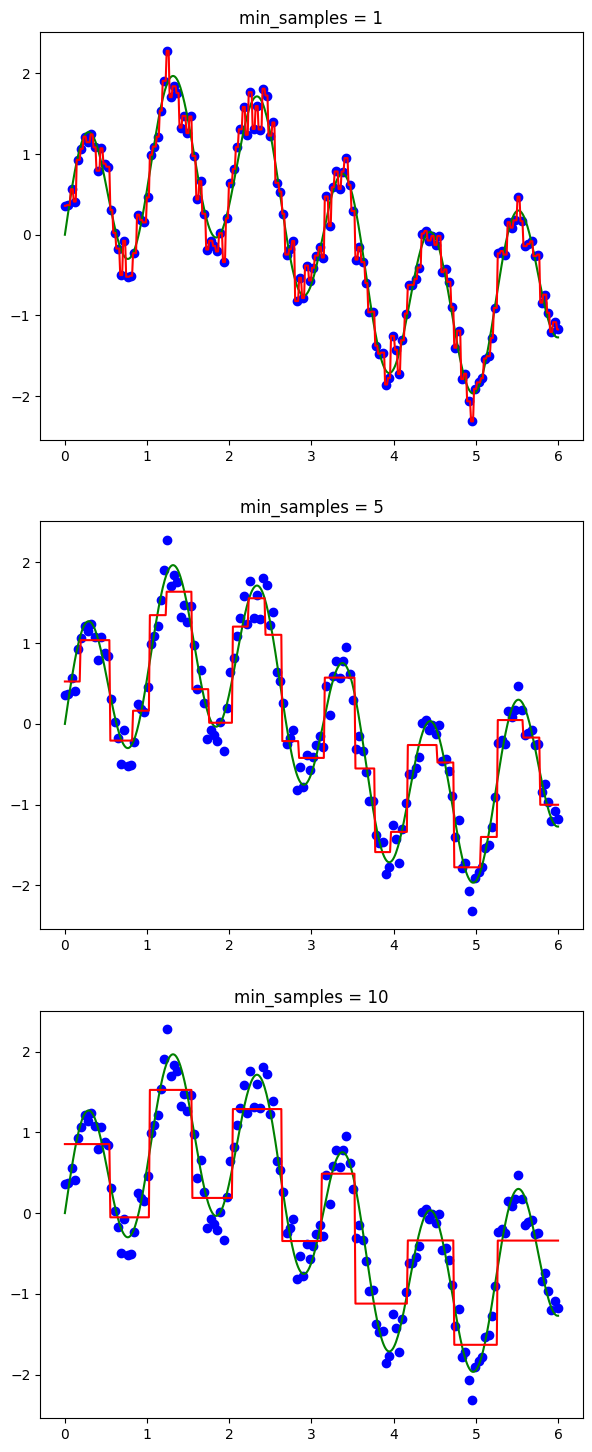


Prediction data
0.0 0.21902617919493897 0.31644348493826896

Test data


(np.float64(0.16278777768213148),
 np.float64(0.23294749792902855),
 np.float64(0.3268140437463129))

In [26]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# sample leaf 1
tree1 = DecisionTreeRegressor(min_samples_leaf=1)
tree1.fit(x_train, y_train)
y_predict1 = tree1.predict(x_test)

# sample leaf 5
tree5 = DecisionTreeRegressor(min_samples_leaf=5)
tree5.fit(x_train, y_train)
y_predict2 = tree5.predict(x_test)

# sample leaf 10
tree10 = DecisionTreeRegressor(min_samples_leaf=10)
tree10.fit(x_train, y_train)
y_predict3 = tree10.predict(x_test)



fig, axs = plt.subplots(3,1,figsize=(7, 18))

# plot for min_samples = 1:
axs[0].plot(x_train,y_train, 'bo')
axs[0].plot(x_test,y_test, 'g')
# plot the predicted values:
axs[0].plot(x_test, y_predict1, 'r')
axs[0].set_title('min_samples = 1')

# plot for min_samples = 5:
axs[1].plot(x_train,y_train, 'bo')
axs[1].plot(x_test,y_test, 'g')
# plot the predicted values:
axs[1].plot(x_test, y_predict2, 'r')
axs[1].set_title('min_samples = 5')


# plot for min_samples = 10:
axs[2].plot(x_train,y_train, 'bo')
axs[2].plot(x_test,y_test, 'g')
# plot the predicted values:
axs[2].plot(x_test, y_predict3, 'r')
axs[2].set_title('min_samples = 10')
plt.show()


print("\nPrediction data")
mseTrainTree1 = mean_absolute_error(y_train, tree1.predict(x_train))
mseTrainTree2 = mean_absolute_error(y_train, tree5.predict(x_train))
mseTrainTree3 = mean_absolute_error(y_train, tree10.predict(x_train))

print(mseTrainTree1, mseTrainTree2, mseTrainTree3)

print("\nTest data")
mseTestTree1 = mean_absolute_error(y_test, tree1.predict(x_test))
mseTestTree2 = mean_absolute_error(y_test, tree5.predict(x_test))
mseTestTree3 = mean_absolute_error(y_test, tree10.predict(x_test))

mseTestTree1, mseTestTree2, mseTestTree3

### Evaluating the Trees

We can also use `sklearn` to evaluate the tree. There are different metrics that we can use. We will use the 
mean absolute error criterion to evaluate the trees. We can compute the MAE on the train data

In [ ]:
import sklearn.metrics as metrics

y_predict_train1 = regTree1.predict(x_train)
mseTrainTree1 = metrics.mean_absolute_error(y_train, y_predict_train1)
mseTrainTree2 = metrics.mean_absolute_error(y_train, regTree2.predict(x_train))
mseTrainTree3 = metrics.mean_absolute_error(y_train, regTree3.predict(x_train))

mseTrainTree1, mseTrainTree2, mseTrainTree3

And we can compute the MSE on the test data

In [ ]:
import sklearn.metrics as metrics

mseTestTree1 = metrics.mean_absolute_error(y_test, y_predict1)
mseTestTree2 = metrics.mean_absolute_error(y_test, regTree2.predict(x_test))
mseTestTree3 = metrics.mean_absolute_error(y_test, regTree3.predict(x_test))

mseTestTree1, mseTestTree2, mseTestTree3

#### Exercise 1b: Finding the best fit
We can see that trees with `min_samples_leaf = 1` have MSE 0 on the training set as the training set is learned by heart. However, the error on the test set is the one that really counts. Here, also `min_samples_leaf = 1` performs the best, but **can you find better settings of `min_samples_leaf`**?
- Go back to [Exercise 1a](#Exercise-1a:-Training-the-Tree) and try different values of `min_samples_leaf`. Then use the code in [Evaluating the trees](#Evaluating-the-Trees) to evaluate these on the training and the test set.
- Can you find a value `min_samples_leaf` which results in a smaller **MSE on the test set** than `min_samples_leaf=1`?

## Decision Trees
In contrast to regression trees, the output for a decision tree is a discrete class label, not 
a continuous value. A decision tree can be used for any multi-label classification problem. We will use the 
decision trees on the iris data set. We do **not** use the same features as in lecture examples.
Instead, we will only use the first two features `sepal_length` and `sepal_width` in the training data as input
for illustration purposes. 

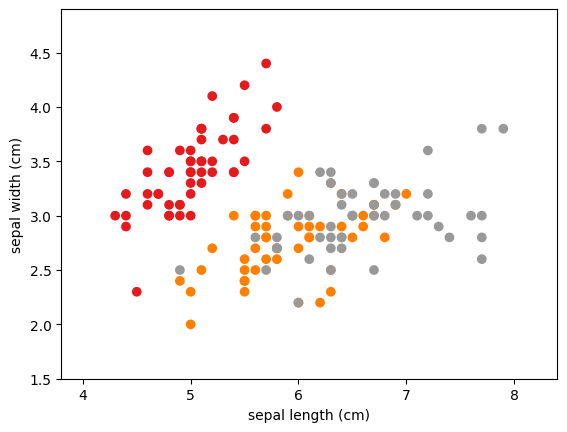

In [28]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure()
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

The iris data set contains 3 classes of iris flowers that should be classified according to their sepal width 
and sepal length.  

We split the data set into 67% training data and 33% test data. I.e., we have 100 training and 50 test points. 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((100, 2), (50, 2))

### Training a Decision Tree

We will again use the `sklearn` package. A decision tree can be generated by:

In [30]:
from sklearn import tree

decTree = tree.DecisionTreeClassifier(min_samples_leaf=2, max_depth=None)

We can set the same properties as for a regression tree. Similarly, we can train the tree:

In [31]:
decTree = decTree.fit(X_train, Y_train)

We can use the trained tree for prediction by:

In [32]:
y_predict = decTree.predict(X_test)

#### Exercise 2a: Decision boundary analysis
In this excercise we want to train a decision tree for different values of `min_samples_leaf`. After training the tree,
we will plot the decision boundary of the learned tree with the existing python code.
- Plot the decision boundary for different number of `min_samples_leaf`.
- Can you observe a qualitatitve difference between the learned classifiers?
- Which value of `min_samples_leaf` would you choose?

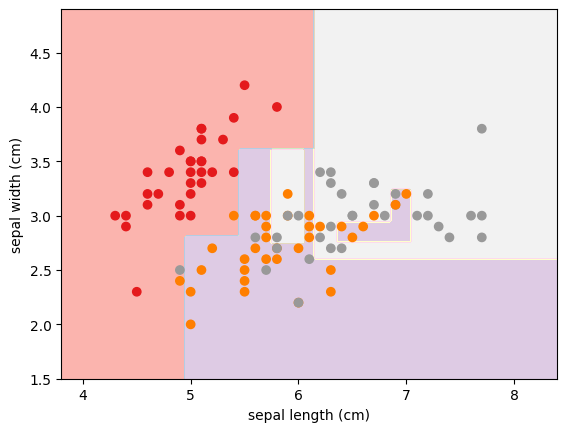

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

n_classes = 3
plot_step = 0.02

######################################
##### CHANGE THE FOLLOWING LINE: #####
######################################
clf = DecisionTreeClassifier(min_samples_leaf=2)

clf = clf.fit(X_train, Y_train)  

# create a grid for the two input dimensions
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

plt.figure()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Set1)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axis("tight")
plt.show()


### Evaluating Decision Trees
For evaluating the decision tree, we can compute the ratio of correctly 
classified samples on the test set. This metric is called  `accuracy_score` in sklearn. 

In [ ]:
from sklearn import metrics

train_accuracy = metrics.accuracy_score(Y_train, clf.predict(X_train))
test_accuracy = metrics.accuracy_score(Y_test, clf.predict(X_test))

train_accuracy, test_accuracy

#### Exercise 2b: Qualitative analysis

For the values of `min_samples_leaf = [1,2,3,5,7,10, 15, 20, 50]`, compute the `accuracy_score` on the train and on 
the test set. Plot both accuracy scores as a function of `min_samples_leaf`. You should be able to identify areas where the model is **overfitting** and **underfitting** on the plot:
- _Overfitting_ is characterised by a high training accuracy but a low (and improving) testing accuracy. For which values of `min_samples_leaf` is the model _overfitting_?
- _Underfitting_ happens when both training and testing performance are low/degrading. For which values of `min_samples_leaf` is the model _underfiting_?

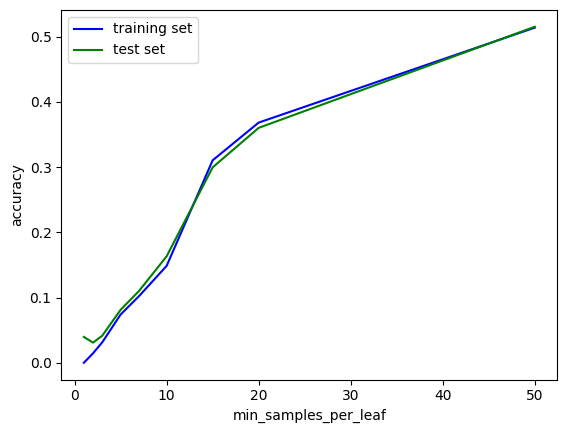

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

minSamples = [1,2,3,5,7,10, 15, 20, 50]
train_accuracy = np.zeros((len(minSamples),1))
test_accuracy = np.zeros((len(minSamples),1))


for i in range(0,len(minSamples)):
   
    ######################################
    ##### YOUR CODE GOES HERE: ###########
    ######################################
    clf = DecisionTreeRegressor(min_samples_leaf=minSamples[i])
    
    # Fit it to your data
    clf.fit(x_train, y_train)
    
    # Predict on the training data
    y_train_predict = clf.predict(x_train)
    
    # Predict on the test data
    y_test_predict = clf.predict(x_test)
    
    # Store the train and test error
    train_accuracy[i] = mean_squared_error(y_train, y_train_predict)
    test_accuracy[i] = mean_squared_error(y_test, y_test_predict)
    

plt.figure()
plt.plot(minSamples, train_accuracy, 'b')
plt.plot(minSamples, test_accuracy, 'g')
plt.xlabel('min_samples_per_leaf')
plt.ylabel('accuracy')
plt.legend(('training set', 'test set'))
#plt.savefig('classification_minSamples.png')
plt.show()


### Decision Forests

We will again use the sklearn package. A decision forest can be generated by:

In [68]:
from sklearn import ensemble

decForest = ensemble.RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_depth=None)

We can set the same properties as for a decision forest (including number of trees by `n_estimator`). 
Similarly, we can train the forest

In [69]:
decForest = decForest.fit(X_train, Y_train)

We can use the trained tree for prediction by:

In [70]:
y_predict = decForest.predict(X_test)

#### Exercise 3a: Qualitative analysis of `n_estimators`
In this excercise we want to train a decision forests for different values of `n_estimators`. After training the forest, we will plot the decision boundary of the learned forest with the existing python code. 
- Plot the decision boundary for different number of `n_estimators` and use `min_samples_leaf = 10`.
- Can you observe a qualitatitve difference between the learned classifiers?
- Execute your code several times. Can you observe a difference between the executions? If yes, why?

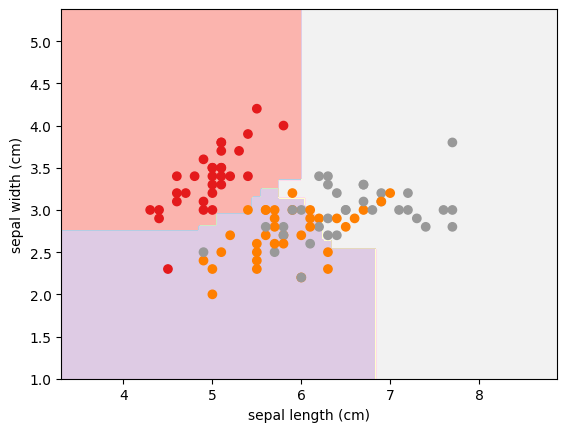

The data follows a general trend but has minor variations between each graph generation as RandomForestClassifier naturally has some level of variability


In [82]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

n_classes = 3
plot_colors = "bry"
plot_step = 0.02


# Load the iris dataset 
iris = datasets.load_iris() 
X = iris.data[:, :2] 
Y = iris.target

######################################
##### CHANGE THE FOLLOWING LINE: #####
######################################
clf = ensemble.RandomForestClassifier(n_estimators=3, min_samples_leaf=10, max_depth=None)

# n_estimators refers to the number of trees within a forest. More trees generally leads to better performance but holds dimishing returns on greater values and a potential risk of overfitting.

######################################
##### YOUR CODE GOES HERE: ###########
######################################
# fit the model to the data:
clf = RandomForestClassifier(n_estimators=30, min_samples_leaf=10)
clf.fit(X, Y) 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1



xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

plt.figure()

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Set1)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axis("tight")
#plt.savefig('classification_forest.png')
plt.show()

print("The data follows a general trend but has minor variations between each graph generation as RandomForestClassifier naturally has some level of variability")
# randomness can be controlled by changing the ForestClassifier line to "clf = RandomForestClassifier(n_estimators=30, min_samples_leaf=10, random_state=42)"



#### Exercise 3b: Quantitative analysis of `min_samples_leaf`

The below cell should similarly examine the effect of varying `min_samples_leaf` for RandomForests:
- Fill in the missing parts of the code, making sure you repeat the training/testing process for each configuration `numTrials` times (which is set to 10). This is similar to our [previous analysis on trees](#Exercise-2b:-Qualitative-analysis) (with an additional nested `for` loop repeating the training `numTrials` times).
- The implementation is split in two cells as the first cell can take a while to run. Once you are satisfied with your implementation, **run the second cell** to visually examine the effect of varying `min_samples_leaf`.
- Taking into account what you know about overfitting and underfitting, which value of `min_sample_leaf` would you chose based on the below graph?
- If you run the below cells of code multiple times, does the graph change? Why? Does that change your choice?

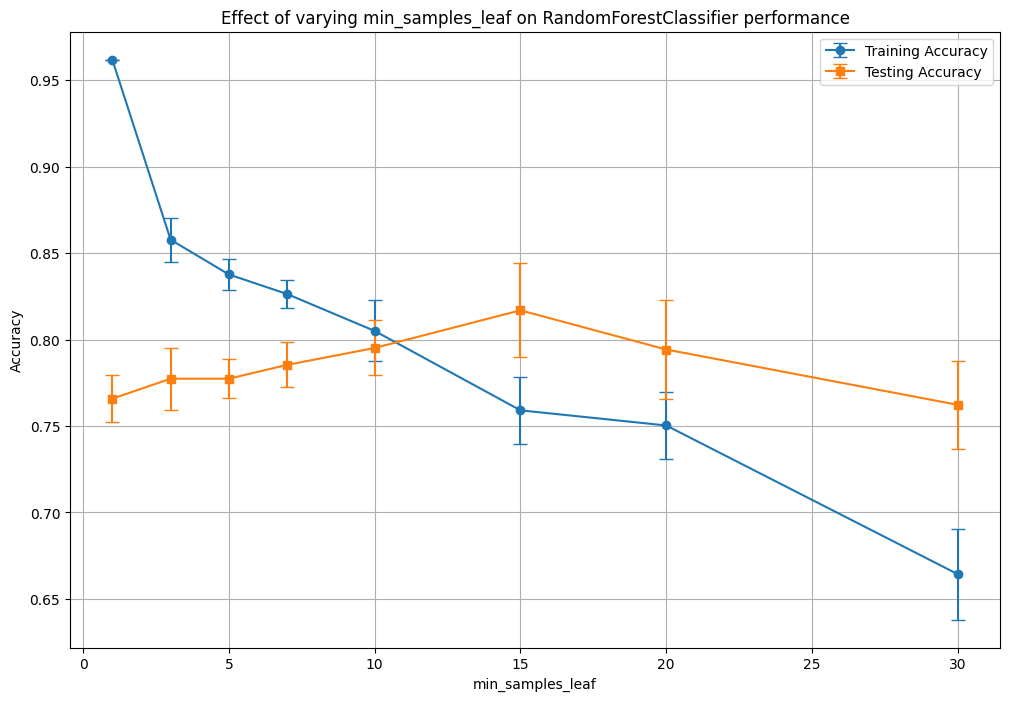

In [95]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

minSamples = [1,3,5,7,10, 15, 20, 30]

numTrials = 100
train_accuracy_single = np.empty((len(minSamples),numTrials))
test_accuracy_single = np.empty((len(minSamples),numTrials))

# import iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

# store the mean test/train accuracy for all the 10 trials for a certain value of min_samples
train_accuracy_mean = np.empty((len(minSamples),1))
test_accuracy_mean = np.empty((len(minSamples),1))

# store the standard deviation of test/train accuracy for all the 10 trials for a certain value of min_samples
train_accuracy_std = np.empty((len(minSamples),1))
test_accuracy_std = np.empty((len(minSamples),1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

for i in range(len(minSamples)):
    ######################################
    ##### YOUR CODE GOES HERE: ###########
    ######################################
    # Declare a RandomForestClassifier taking as input minSamples[i], and using 100 estimators
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=minSamples[i])
    
    # Repeat each experiment numTrials times
    for j in range(numTrials):
        clf.fit(X_train, Y_train)
        
        # Store the train and test accuracy for the model using minSamples[i], for the trial j
        train_accuracy_single[i, j] = clf.score(X_train, Y_train)
        test_accuracy_single[i, j] = clf.score(X_test, Y_test)

    # the below code calculates the mean and standard deviation across
    # your numTrials trials and should not be changed
    train_accuracy_mean[i] = np.mean(train_accuracy_single[i,:])
    train_accuracy_std[i] = np.std(train_accuracy_single[i,:])
    
    test_accuracy_mean[i] = np.mean(test_accuracy_single[i,:])
    test_accuracy_std[i] = np.std(test_accuracy_single[i,:])


plt.figure(figsize=(12, 8))
plt.errorbar(minSamples, train_accuracy_mean.flatten(), yerr=train_accuracy_std.flatten(), label='Training Accuracy', fmt='-o', capsize=5)
plt.errorbar(minSamples, test_accuracy_mean.flatten(), yerr=test_accuracy_std.flatten(), label='Testing Accuracy', fmt='-s', capsize=5)
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Effect of varying min_samples_leaf on RandomForestClassifier performance')
plt.legend()
plt.grid(True)
plt.show()




    

_Note: the errorbar function of matplotlib has undergone recent changes. If the below code does not work for you because you're running an older version of matplotlib, you can use the commented lines which do not plot the error bars instead, they should definitely work._

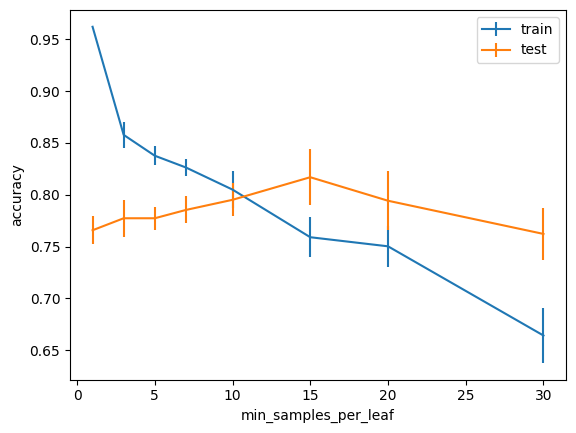

In [101]:
plt.figure()

plt.errorbar(minSamples, train_accuracy_mean.squeeze(), yerr = train_accuracy_std.ravel(), label='train')
plt.errorbar(minSamples, test_accuracy_mean.squeeze(), yerr = test_accuracy_std.ravel(), label='test')
#plt.plot(minSamples, train_accuracy_mean, label='train')
#plt.plot(minSamples, test_accuracy_mean, label='test')
plt.legend()
plt.xlabel('min_samples_per_leaf')
plt.ylabel('accuracy')
plt.show()

#### Exercise 3c: Quantitative analysis of `n_estimators`

Test the algorithm for a different number of trees, i.e., [1,5,10,20,40,60,100]. Repeat each experiment 10 times and average over the performance values due to the randomness. Evaluate the average accuracy on the training and on the test set for the given number of trees (`n_estimators`). 
Use `min_samples_leaf = 15`.
- Fill in the missing parts of the code, making sure you repeat the training/testing process for each configuration `numTrials` times (which is set to 10). This is similar to the [previous exercise](#Exercise-3b:-Quantitative-analysis-of-min_samples_leaf).
- Which value of `n_estimators` would you chose? Has your choice changed from [Exercise 3a](#Exercise-3a:-Qualitative-analysis-of-n_estimators)?
- Can you comment on the behaviour of the classifier for `n_estimator < 50`?
- Can you comment on the behaviour of the classifier for `n_estimator > 200`?

_Note: the below cells might take a few moments to execute._

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

numTrees  = [1,5,10,20,40,60,100]

numTrials = 10

# import iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

# store test/train accuracy for every trial
train_accuracy_single = np.empty((len(numTrees),numTrials))
test_accuracy_single = np.empty((len(numTrees),numTrials))

# store the mean test/train accuracy for all the 10 trials for a certain value of n_estimators
train_accuracy_mean = np.empty((len(numTrees),1))
test_accuracy_mean = np.empty((len(numTrees),1))

# store the standard deviation of test/train accuracy for all the 10 trials for a certain value of n_estimators
train_accuracy_std = np.empty((len(numTrees),1))
test_accuracy_std = np.empty((len(numTrees),1))

# splitting dataset into training and testing sample sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

for i in range(0,len(numTrees)):
    ######################################
    ##### YOUR CODE GOES HERE: ###########
    ######################################
    # declare a RandomForestClassifier taking as input numTrees[i], and using minimum 15 samples per leaf
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=minSamples[i])
    
    # Repeat each experiment numTrials times
    for j in range(numTrials):
        clf.fit(X_train, Y_train)
        
        # Store the train and test accuracy for the model using minSamples[i], for the trial j
        train_accuracy_single[i, j] = clf.score(X_train, Y_train)
        test_accuracy_single[i, j] = clf.score(X_test, Y_test)

    # the below code calculates the mean and standard deviation across your numTrials trials
    train_accuracy_mean[i] = np.mean(train_accuracy_single[i,:])
    train_accuracy_std[i] = np.std(train_accuracy_single[i,:])
    
    test_accuracy_mean[i] = np.mean(test_accuracy_single[i,:])
    test_accuracy_std[i] = np.std(test_accuracy_single[i,:])

plt.figure()
#plt.plot(numTrees, train_accuracy_mean, 'b', label='train')
#plt.plot(numTrees, test_accuracy_mean, 'g', label='test')
plt.errorbar(numTrees, train_accuracy_mean.squeeze(), yerr = train_accuracy_std.ravel(),  label='train')
plt.errorbar(numTrees, test_accuracy_mean.squeeze(), yerr = test_accuracy_std.ravel(), label ='test')
plt.legend()
# Always label your axes
plt.xlabel("numTrees")
plt.ylabel("accuracy")


#plt.savefig('classification_forest_numtrees.png')
plt.show()

_Note: the errorbar function of matplotlib has undergone recent changes. If the below code does not work for you, you can use the commented lines which do not plot the error bars instead, they should definitely work._

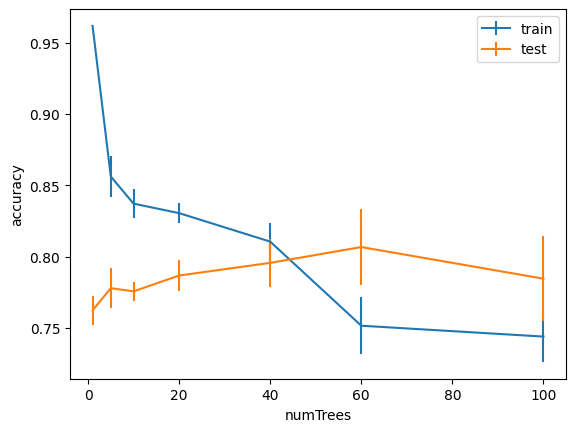

In [103]:
plt.figure()

#plt.plot(numTrees, train_accuracy_mean, 'b', label='train')
#plt.plot(numTrees, test_accuracy_mean, 'g', label='test')
plt.errorbar(numTrees, train_accuracy_mean.squeeze(), yerr = train_accuracy_std.ravel(),  label='train')
plt.errorbar(numTrees, test_accuracy_mean.squeeze(), yerr = test_accuracy_std.ravel(), label ='test')
plt.legend()
# Always label your axes
plt.xlabel("numTrees")
plt.ylabel("accuracy")


#plt.savefig('classification_forest_numtrees.png')
plt.show()